In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## We called our libraries.

dataSet = pd.read_csv("datasOfLeagues.csv", sep = ";", encoding="latin-1")
## We called our dataset

dataSetDF = pd.DataFrame(dataSet)
## We made dataframe.

In [72]:
## I want to see column names.

print(dataSetDF.head())

  Country   League   Club       Player Names  Matches_Played  Substitution   \
0   Spain  La Liga  (BET)    Juanmi Callejon              19             16   
1   Spain  La Liga  (BAR)  Antoine Griezmann              36              0   
2   Spain  La Liga  (ATL)        Luis Suarez              34              1   
3   Spain  La Liga  (CAR)       Ruben Castro              32              3   
4   Spain  La Liga  (VAL)      Kevin Gameiro              21             10   

   Mins  Goals      xG xG Per Avg Match  Shots  OnTarget Shots Per Avg Match  \
0  1849     11  Haz.62             0.34     48        20              Þub.47   
1  3129     16  Kas.86             0.36     88        41              Þub.67   
2  2940     28   23.21             0.75    120        57              Mar.88   
3  2842     13  14.Haz             0.47    117        42              Mar.91   
4  1745     13  Eki.65             0.58     50        23              Þub.72   

  On Target Per Avg Match  Year  
0         

In [73]:
## I want to compare goals and xG ratios.

print(dataSetDF[["Goals", "xG"]])

     Goals      xG
0       11  Haz.62
1       16  Kas.86
2       28   23.21
3       13  14.Haz
4       13  Eki.65
..     ...     ...
655     10  Tem.49
656     12  Eyl.77
657      7  May.72
658     15   14.51
659      7  Nis.43

[660 rows x 2 columns]


In [74]:
## I want to look at base statistic in goals column

minGoals = dataSetDF["Goals"].min()
maxGoals = dataSetDF["Goals"].max()
meanGoals = dataSetDF["Goals"].mean()
medianGoals = dataSetDF["Goals"].median()
modeGoals = dataSetDF["Goals"].mode()
stdGoals = dataSetDF["Goals"].std()

## I want to see all the base results in a dataframe.

statsGoalsDF = pd.DataFrame({
    "Min" : [minGoals],
    "Max" : [maxGoals],
    "Mean" : [meanGoals],
    "Median" : [medianGoals],
    "Mode" : [modeGoals],
    "Std" : [stdGoals]
})
print(statsGoalsDF)

   Min  Max       Mean  Median                               Mode       Std
0    2   37  11.784848    11.0  0    11
Name: Goals, dtype: int64  5.982454


In [75]:
statsGoals_df = pd.DataFrame({
    'Min': [dataSetDF['Goals'].min()],
    'Max': [dataSetDF['Goals'].max()],
    'Mean': [dataSetDF['Goals'].mean()],
    'Median': [dataSetDF['Goals'].median()],
    'Mode': [dataSetDF['Goals'].mode().iloc[0]],
    'Std': [dataSetDF['Goals'].std()]
})

print(statsGoals_df)

   Min  Max       Mean  Median  Mode       Std
0    2   37  11.784848    11.0    11  5.982454


In [76]:
## Mean, mode, and median almost equal. We can say we have normal distribution. 
## Std value is not much. We can say in the five biggest football league, goals are balanced.

In [77]:
## I want to look at xG base statistical values.
dataSetDF["xG"] = pd.to_numeric(dataSetDF["xG"], errors = "coerce")


minxG = dataSetDF["xG"].min()
maxxG = dataSetDF["xG"].max()
meanxG = dataSetDF["xG"].mean()
medianxG = dataSetDF["xG"].median()
modexG = dataSetDF["xG"].mode()
stdxG = dataSetDF["xG"].std()

statsxG_df = pd.DataFrame({
    'Min': [dataSetDF['xG'].min()],
    'Max': [dataSetDF['xG'].max()],
    'Mean': [dataSetDF['xG'].mean()],
    'Median': [dataSetDF['xG'].median()],
    'Mode': [dataSetDF['xG'].mode().iloc[0]],
    'Std': [dataSetDF['xG'].std()]
})

print(statsxG_df)

    Min    Max       Mean  Median   Mode       Std
0  0.71  32.54  16.882973  15.965  14.51  5.303188


In [78]:
## Mean, median and mode have different numbers. So, xG values have anormal distrubiton according to Goals.

In [79]:
## Now I will look at the CV value the two values. Then, I will make a correlation.

goalsCV = (meanGoals/stdGoals) * 100
xGCV = (meanxG/stdxG) * 100

print(goalsCV)
print(xGCV)

196.9902090649602
318.3551409630528


In [80]:
## We can say, xG is more distributer than Goals.

## We will make control the two columns have a correlation between self.

## The two columns have numerical mean. mode, median, and mean values near. So we can say that, the two columns are normal.
## Therefor we will make Pearson correlation.

xGGoals = pd.DataFrame(dataSetDF[["Goals", "xG"]].isna().sum())

corGoalsXG = xGGoals.corr()
corGoalsXG

,0
0,1.0


In [81]:
## We have powerfull positive relation xG values and Goals values.
## So the leagues footballer can make score as expected values as.

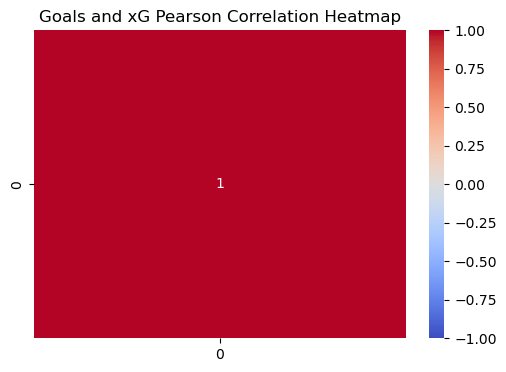

In [83]:
plt.figure(figsize=(6, 4))
sns.heatmap(corGoalsXG, annot = True, cmap = "coolwarm", vmin = -1, vmax = 1, center = 0)
plt.title("Goals and xG Pearson Correlation Heatmap")
plt.show()

In [84]:
dataSetDF["xG"] = pd.to_numeric(dataSetDF["xG"], errors="coerce")
clean = dataSetDF[["Goals", "xG"]].dropna()


plt.figure(figsize=(8, 6))
sns.scatterplot(x="Goals", y="xG", data=xGGoals, alpha=0.5)
plt.xlabel("Goals")
plt.ylabe("xG")
plt.title("xG and Goals Correlation Distribution Graph")
plt.grid(True)
plt.show()

ValueError: Could not interpret value `Goals` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>